@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}

### pip install bayesian-optimization (in terminal)

### Specifying the function to be optimized:

Define the function to be optimized:

In [19]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np



#Change the function to be optimized here 

def black_box_function(x, y):
    return np.sin(x**2) + 3*y

### Plot the objective function:

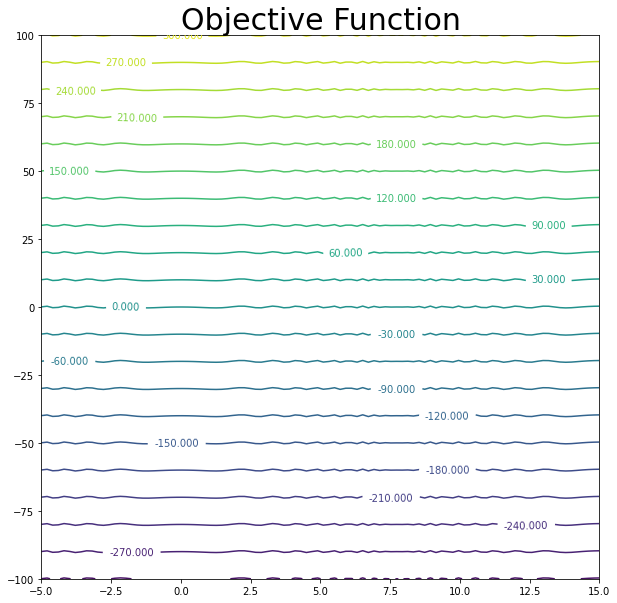

In [20]:
xmin = -5
xmax = 15
ymin = -100
ymax = 100


x = np.linspace(xmin,xmax,100)
y = np.linspace(ymin,ymax,100)
xx, yy = np.meshgrid(x,y)
z = black_box_function(xx,yy)
fig, ax = plt.subplots(figsize=(10,10))
cs = ax.contour(z, extent=(xmin,xmax,ymin,ymax), levels = 20)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Objective Function', fontsize = 30)
plt.show()

### Getting started:

1. Import the "BayesianOptimization" object.
2. Specify a function to be optimized, f. 
3. Specify its parameters with their corresponding bounds, pbounds. (This is a constrained optimization technique, so you must specify the minimum and maximum values that can be probed for each parameter in order for it to work.)

In [16]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (-100, 100), 'y': (-100, 100)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1)

Parameters to maximized:

<strong>n_iter</strong>: Specifies the number of steps of the Bayesian optimization to perform. Iterating over more steps will increase the liklihood of finding the maximum.

<strong>init_points</strong>: Specifies the number of steps of random exploration to perform. Random exploration can help by diversifying the exploration space.

In [17]:
optimizer.maximize(
    init_points=10,
    n_iter=10,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.003618 | -16.6     |  44.06    |
|  2        |  0.0001   | -99.98    | -39.53    |
|  3        |  0.000200 | -70.65    | -81.53    |
|  4        |  0.000253 | -62.75    | -30.89    |
|  5        |  0.00234  | -20.65    |  7.763    |
|  6        |  0.003814 | -16.16    |  37.04    |
|  7        |  0.000286 | -59.11    |  75.62    |
|  8        |  0.000111 | -94.52    |  34.09    |
|  9        |  0.003642 | -16.54    |  11.74    |
|  10       |  0.000193 | -71.92    | -60.38    |
|  11       |  1.4      |  2.048    |  21.39    |
|  12       |  0.6079   |  8.284    |  21.68    |
|  13       |  1.036    | -0.05959  |  18.37    |
|  14       |  0.7522   | -0.5956   |  24.76    |
|  15       |  0.8409   |  3.064    |  18.06    |
|  16       |  0.7298   |  3.396    |  25.19    |
|  17       |  0.9846   |  0.3941   |  21.76    |
|  18       |  0.7117   |  3.573    |  22.44    |


The property <strong>optimizer.max</strong> returns the best combination of parameters and target value found.

In [18]:
print(optimizer.max)

{'target': 1.3999990217638039, 'params': {'x': 2.047631762874346, 'y': 21.392428024494905}}


The property <strong>optimizer.res</strong> returns the list of all parameters probed and their corresponding target values.

In [8]:
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': 131.32914714326708, 'params': {'x': -16.595599059485195, 'y': 44.06489868843161}}
Iteration 1: 
	{'target': -119.50155358190621, 'params': {'x': -99.97712503653102, 'y': -39.53348547363205}}
Iteration 2: 
	{'target': 134.13424610037518, 'params': {'x': -15.620084795114494, 'y': 45.00173950030185}}
Iteration 3: 
	{'target': 299.4537228867224, 'params': {'x': 95.92863386624244, 'y': 100.0}}
Iteration 4: 
	{'target': -117.56856367367455, 'params': {'x': 100.0, 'y': -39.08764976159543}}
Iteration 5: 
	{'target': 299.6943856111117, 'params': {'x': -100.0, 'y': 100.0}}
Iteration 6: 
	{'target': 300.68410524927066, 'params': {'x': -36.09719622034377, 'y': 100.0}}
Iteration 7: 
	{'target': 299.49150277502, 'params': {'x': 41.91281107240906, 'y': 100.0}}
Iteration 8: 
	{'target': 298.56200715166403, 'params': {'x': -70.88656898108036, 'y': 99.85314384498253}}
Iteration 9: 
	{'target': 300.19653252423603, 'params': {'x': 2.5622900765289103, 'y': 99.9727053083675}}
Itera

The function <strong>set_bounds</strong> can be used to modify the bounds, which allows for any combination of existing parameters and their associated new bounds to be passed.

In [6]:
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

optimizer.maximize(
    init_points=0,
    n_iter=5,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  6        | -2.942    |  1.98     |  0.8567   |
|  7        | -0.4597   |  1.096    |  1.508    |
|  8        |  0.5304   | -0.6807   |  1.079    |
|  9        | -5.33     | -1.526    |  3.0      |
|  10       | -5.419    | -2.0      | -0.5552   |


### Guiding the probe:

If the user has an idea as to where the maxima/minima may occur, specific points can be selected for probing. The default is to explore lazily (lazy=True), meaning these points will be evaluated only the next time you call <strong>maximize</strong>. This probing process happens before the Gaussian Process takes over.

Parameters can be passed as dictionaries or as an iterable.

In [7]:
optimizer.probe(
    params={"x": 0.5, "y": 0.7},
    lazy=True,
)

optimizer.probe(
    params=[-0.3, 0.1],
    lazy=True,
)

# Will probe only the two points specified above
optimizer.maximize(init_points=0, n_iter=0)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  11       |  0.66     |  0.5      |  0.7      |
|  12       |  0.1      | -0.3      |  0.1      |


### Loop to Test Performance of Optimizer

In [4]:
maxvalue = []
for i in range(5):
    optimizer.maximize(
    init_points=1,
    n_iter=10,)
    maxvalue.append(optimizer.max['target'])


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  2        | -119.5    | -99.98    | -39.53    |
|  3        |  134.1    | -15.62    |  45.0     |
|  4        |  299.5    |  95.93    |  100.0    |
|  5        | -117.6    |  100.0    | -39.09    |
|  6        |  299.7    | -100.0    |  100.0    |
|  7        |  300.7    | -36.1     |  100.0    |
|  8        |  299.5    |  41.91    |  100.0    |
|  9        |  298.6    | -70.89    |  99.85    |
|  10       |  300.2    |  2.562    |  99.97    |
|  11       |  298.7    |  68.87    |  99.9     |
|  12       |  299.2    | -13.7     |  100.0    |
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  13       | -243.9    | -70.65    | -81.53    |
|  14       |  300.9    |  21.75    |  99.97    |
|  15       |  299.0    | -42.22    |  100.0    |
|  16       |  299.5    | -86.13    |  100.0    |
|  17       |  300.6    |  27.95    |  99.93    |


In [7]:
np.mean(maxvalue)

300.91971596580925